<DIV ALIGN=CENTER>

# Support Vector Machine
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore how to effectively use support vector machine for both classification and regression problems. First, we repeat the SVM analysis done in the Introduction to Machine Learning Notebook from Week 1, which first introduced SVM.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(style="white")

# Convenience function to plot confusion matrix

# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine leanring method.

def confusion(test, predict, title):
    # Define names for the three Iris types
    names = ['setosa', 'versicolor', 'virginica']

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins=3)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=names, columns=names )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")
    hm.axes.set_title(title)
    
    return None

-----

Get Data and start

-----

In [2]:
# Load the Iris Data
iris = sns.load_dataset("iris")

# Now lets get the data and labels

data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
labels = np.array([i//50 for i in range(iris.shape[0])])

# We want to split our data into training and testing

from sklearn import cross_validation

# This is the amount to hold out for 'blind' testing
frac = 0.4

d_train, d_test, l_train, l_test \
    = cross_validation.train_test_split(data, labels, test_size=frac, random_state=0)

-----

## [Support Vector Machine][svm] (SVM)

The next algorithm we will demonstrate is a powerful, but simple
approach to algorithmically divide data into distinct classes.  Support
Vector Machine, or Support Vector Classification (SVC) in this case,
determine optimal hyperplanes that optimally divide the training data.
Generally we use linear hyperplanes, which results in linear SVC. This
is demonstrated in the following figure from Wikipedia, where H3 does
not divide the data into the correct two classes, H1 does divide the two
but not optimally, while H2 optimally divides the data into the two
classes.

![SVM Image from Wikipedia][svmi]

We perform linear SVC in scikit-learn by specifying a `linear` kernel
parameter when creating the classifier. Once we fit the model to the
data, we can once again use the trained model to make predictions, which
we can test by using the evaluation score and confusion matrix.

-----

[svm]: https://en.wikipedia.org/wiki/Support_vector_machine
[svmi]: https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/503px-Svm_separating_hyperplanes.png

In [3]:
# Next lets try Linear SVM
from sklearn import svm

# Lets build our model and train it all at once
clf = svm.SVC(kernel='linear', C=1).fit(d_train, l_train)

# Now grab the predictions
result = clf.predict(d_test)

print("SVM prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(d_test, l_test)))

SVM prediction accuracy =  96.7%


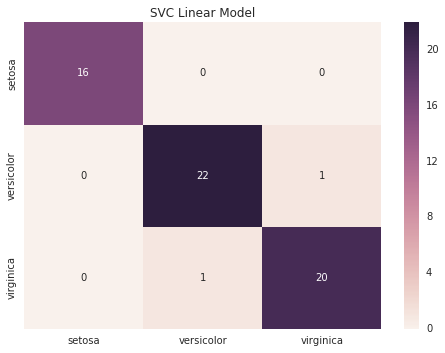

In [4]:
confusion(l_test, result, 'SVC Linear Model')